In [1]:
import numpy as np
import tensorflow as tf
import functools
from keras.metrics import top_k_categorical_accuracy
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

In [2]:
x = np.load("/home/lusk.c/XN_project/denseNetTest.npy")
y = np.load("/home/lusk.c/XN_project/denseNetyTest.npy")

In [3]:
model = tf.keras.models.load_model('densenet.h5',custom_objects={"top3_acc": top3_acc})

In [4]:
prediction = model.predict(x)

In [5]:
count = 0
predictions = np.zeros(prediction.shape[0])
while count < prediction.shape[0]:
    row = prediction[count,:]
    predictions[count] = np.argmax(row)
    count +=1
predictions.shape

(5600,)

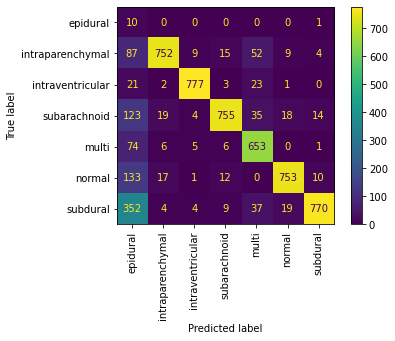

In [6]:
cm = confusion_matrix(predictions, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["epidural", "intraparenchymal", "intraventricular", "subarachnoid","multi","normal","subdural"])
disp.plot(xticks_rotation = "vertical")
plt.show()

In [11]:
cm[0,0] = 452
cm[1,0] = 18
cm[2,0] = 7
cm[3,0] = 50
cm[4,0] = 20
cm[5,0] = 39
cm[6,0] = 79
cm[0,1] = 12
cm[0,2] = 29
cm[0,3] = 12
cm[0,4] = 7
cm[0,5] = 13
cm[0,6] = 22
cm

array([[452,  12,  29,  12,   7,  13,  22],
       [ 18, 752,   9,  15,  52,   9,   4],
       [  7,   2, 777,   3,  23,   1,   0],
       [ 50,  19,   4, 755,  35,  18,  14],
       [ 20,   6,   5,   6, 653,   0,   1],
       [ 39,  17,   1,  12,   0, 753,  10],
       [ 79,   4,   4,   9,  37,  19, 770]])

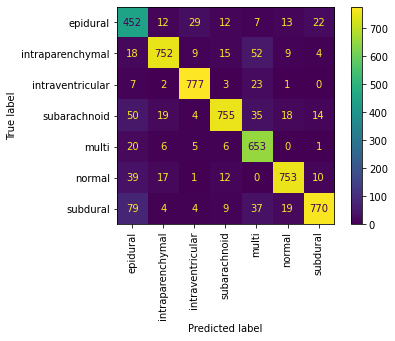

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["epidural", "intraparenchymal", "intraventricular", "subarachnoid","multi","normal","subdural"])
disp.plot(xticks_rotation = "vertical")
plt.show()

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           